## Libraries

In [1]:
#general libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")

In [2]:
#libraries calculate the performance
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_curve, confusion_matrix, average_precision_score 

In [3]:
#libraries for classifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

In [4]:
#model selection, evaluation and dimensionality reduction
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.decomposition import PCA

In [5]:
#libraries for unbalanced data
from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour, NearMiss
from imblearn.under_sampling import EditedNearestNeighbours, RepeatedEditedNearestNeighbours, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek

Using TensorFlow backend.


In [6]:
#other libraries
import warnings
import random
from collections import Counter

In [7]:
#dataset
ds = pd.read_csv("imbalanced_edm_vit_data.csv")
ds.head()

,Email Address,Gender,Nationality,Mother Tongue/ First Language,Teaching Language in University,High School Percentage,Present Year of Study (Status),Living Location,Any Parent Works in University?,Does Student has scholarship?,...,Mother's Qualification,Father's Occupation Status,Mother's Occupation Status,No. of Friends,Average number of hours you spend with your friends in one week,CGPA,Does the student have any outside sponsorship for study?,Religion,No. of languages you know,Result
0,kumarkaushik1580@gmail.com,Male,Indian,Hindi,English,Excellent (90-100%),3rd Year,Inside campus,No,No,...,Graduate,Currently in Service,Currently in Service,Average,Average(2-8 hours),Fair (6.0 - 8.5),No,Hindu,2,Pass
1,divam.kesharwani@gmail.com,Male,Indian,Hindi,English,Excellent (90-100%),3rd Year,Inside campus,No,No,...,Graduate,Currently in Service,NaN,Average,Average(2-8 hours),Very Good (9.0 - 9.5),No,Hindu,2,Pass
2,vbhandari2999@gmail.com,Male,Indian,English,English,Excellent (90-100%),3rd Year,Inside campus,No,No,...,Post Graduate,Currently in Service,Currently in Service,Average,Above Average (8-14 hours),Very Good (9.0 - 9.5),No,Hindu,2,Pass
3,unnatbasa@gmail.com,Male,Indian,Others(Tamil/Telugu/Kannada/Malayalam/Marathi/...,English,Excellent (90-100%),3rd Year,Inside campus,No,No,...,Graduate,Currently in Service,Currently in Service,High,Above Average (8-14 hours),Fair (6.0 - 8.5),No,Hindu,>2,Pass
4,devamsheth0806@gmail.com,Male,Indian,Others(Tamil/Telugu/Kannada/Malayalam/Marathi/...,English,Very Good (80-90%),3rd Year,Inside campus,No,Yes,...,Secondary/High School,Currently in Service,NaN,Above Average,Average(2-8 hours),Very Good (9.0 - 9.5),Yes,Hindu,>2,Pass


### Data Preprocessing

In [8]:
ds.isnull().values.any()

True

In [9]:
ds.nunique()

Email Address                                                      314
Gender                                                               2
Nationality                                                          3
Mother Tongue/ First Language                                        3
Teaching Language in University                                      2
High School Percentage                                               4
Present Year of Study (Status)                                       4
Living Location                                                      2
Any Parent Works in University?                                      1
Does Student has scholarship?                                        2
How the student comes to University?                                 2
Family Size                                                          4
Total family income                                                  4
Parents Marital Status                                               4
Father

In [10]:
ds.shape

(321, 25)

In [11]:
dx = ds

In [12]:
#removing columns which have no use or have same values throughout the dataset
dx.drop(['Email Address', 'Any Parent Works in University?'], axis = 1, inplace = True)
dx.nunique()

Gender                                                             2
Nationality                                                        3
Mother Tongue/ First Language                                      3
Teaching Language in University                                    2
High School Percentage                                             4
Present Year of Study (Status)                                     4
Living Location                                                    2
Does Student has scholarship?                                      2
How the student comes to University?                               2
Family Size                                                        4
Total family income                                                4
Parents Marital Status                                             4
Father's Qualification                                             6
Mother's Qualification                                             5
Father's Occupation Status        

In [13]:
dx.head()

,Gender,Nationality,Mother Tongue/ First Language,Teaching Language in University,High School Percentage,Present Year of Study (Status),Living Location,Does Student has scholarship?,How the student comes to University?,Family Size,...,Mother's Qualification,Father's Occupation Status,Mother's Occupation Status,No. of Friends,Average number of hours you spend with your friends in one week,CGPA,Does the student have any outside sponsorship for study?,Religion,No. of languages you know,Result
0,Male,Indian,Hindi,English,Excellent (90-100%),3rd Year,Inside campus,No,Walking,Medium Family,...,Graduate,Currently in Service,Currently in Service,Average,Average(2-8 hours),Fair (6.0 - 8.5),No,Hindu,2,Pass
1,Male,Indian,Hindi,English,Excellent (90-100%),3rd Year,Inside campus,No,Walking,With both parents / Nuclear Family,...,Graduate,Currently in Service,NaN,Average,Average(2-8 hours),Very Good (9.0 - 9.5),No,Hindu,2,Pass
2,Male,Indian,English,English,Excellent (90-100%),3rd Year,Inside campus,No,Walking,Medium Family,...,Post Graduate,Currently in Service,Currently in Service,Average,Above Average (8-14 hours),Very Good (9.0 - 9.5),No,Hindu,2,Pass
3,Male,Indian,Others(Tamil/Telugu/Kannada/Malayalam/Marathi/...,English,Excellent (90-100%),3rd Year,Inside campus,No,Walking,With both parents / Nuclear Family,...,Graduate,Currently in Service,Currently in Service,High,Above Average (8-14 hours),Fair (6.0 - 8.5),No,Hindu,>2,Pass
4,Male,Indian,Others(Tamil/Telugu/Kannada/Malayalam/Marathi/...,English,Very Good (80-90%),3rd Year,Inside campus,Yes,Walking,With both parents / Nuclear Family,...,Secondary/High School,Currently in Service,NaN,Above Average,Average(2-8 hours),Very Good (9.0 - 9.5),Yes,Hindu,>2,Pass


In [14]:
#finding columns which have string based values
categ_cols = list(ds.select_dtypes(exclude = ["number"]).columns)
categ_cols

['Gender',
 'Nationality',
 'Mother Tongue/ First Language',
 'Teaching Language in University',
 'High School Percentage',
 'Present Year of Study (Status)',
 'Living Location',
 'Does Student has scholarship?',
 'How the student comes to University?',
 'Family Size',
 'Total family income',
 'Parents Marital Status',
 "Father's Qualification",
 "Mother's Qualification",
 "Father's Occupation Status",
 "Mother's Occupation Status",
 'No. of Friends',
 'Average number of hours you spend with your friends in one week',
 'CGPA',
 'Does the student have any outside sponsorship for study?',
 'Religion',
 'No. of languages you know',
 'Result']

In [15]:
#encoding the data,
def encode (col_name):
    col_cats = list(dx[col_name].unique())
    col_encoded = {}
    for i in range (len(col_cats)) :
        col_encoded[col_cats[i]] = i
    return (col_encoded)

In [16]:
cleanup_nums = {}
for i in categ_cols:
    cleanup_nums[i] = encode(i)

In [17]:
dx.replace(cleanup_nums, inplace=True)
dx.head()

,Gender,Nationality,Mother Tongue/ First Language,Teaching Language in University,High School Percentage,Present Year of Study (Status),Living Location,Does Student has scholarship?,How the student comes to University?,Family Size,...,Mother's Qualification,Father's Occupation Status,Mother's Occupation Status,No. of Friends,Average number of hours you spend with your friends in one week,CGPA,Does the student have any outside sponsorship for study?,Religion,No. of languages you know,Result
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
3,0,0,2,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,1,0
4,0,0,2,0,1,0,0,1,0,1,...,2,0,1,2,0,1,1,0,1,0


In [18]:
X = dx.iloc[:,:-1]
y = dx.iloc[:,-1]
X.shape, y.shape

((321, 22), (321,))

### Functions for sampling-classifiaction process

In [19]:
#sampling function
def reSampler(X, y, samp):
    if(samp == 'None'):
        return splitter(X, y, 0.15)
    if(samp == 'RandomUnderSampler'):
        sm = RandomUnderSampler()
        X_rs , y_rs = sm.fit_sample(X, y)
        return splitter(X_rs , y_rs, 0.15)
    if(samp == 'NearMiss'):
        sm = NearMiss()
        X_rs , y_rs = sm.fit_sample(X, y)
        return splitter(X_rs , y_rs, 0.15)
    if(samp == 'CondensedNearestNeighbour'):
        sm = CondensedNearestNeighbour()
        X_rs , y_rs = sm.fit_sample(X, y)
        return splitter(X_rs , y_rs, 0.15)
    if(samp == 'TomekLinks'):
        sm = TomekLinks()
        X_rs , y_rs = sm.fit_sample(X, y)
        return splitter(X_rs , y_rs, 0.15)
    if(samp == 'EditedNearestNeighbours'):
        sm = EditedNearestNeighbours()
        X_rs , y_rs = sm.fit_sample(X, y)
        return splitter(X_rs , y_rs, 0.15)
    if(samp == 'RepeatedEditedNearestNeighbours'):
        sm = RepeatedEditedNearestNeighbours()
        X_rs , y_rs = sm.fit_sample(X, y)
        return splitter(X_rs , y_rs, 0.15)
    if(samp == 'RandomOverSampler'):
        sm = RandomOverSampler()
        X_rs , y_rs = sm.fit_sample(X, y)
        return splitter(X_rs , y_rs, 0.15)
    if(samp == 'SMOTE'):
        sm = SMOTE()
        X_rs , y_rs = sm.fit_sample(X, y)
        return splitter(X_rs , y_rs, 0.15)
    if(samp == 'SMOTEENN'):
        sm = SMOTEENN()
        X_rs , y_rs = sm.fit_sample(X, y)
        return splitter(X_rs , y_rs, 0.15)
    if(samp == 'SMOTETomek'):
        sm = SMOTEENN()
        X_rs , y_rs = sm.fit_sample(X, y)
        return splitter(X_rs , y_rs, 0.15)

In [20]:
#dataset splitting function
def splitter(X, y, test_Size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_Size, random_state=12)
    return X_train, X_test, y_train, y_test

In [21]:
#roc curve plotting function
def rocPlotter(actu, pred, clf, samp):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(actu, pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    Title = str('ROC: ' + str(clf) + ' using ' + str(samp))
    plt.title(Title)
    plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return roc_auc

In [22]:
#classification model function
def applyModel(clf, X_, y_, xt, yt):
    pca = PCA(n_components=2)
    X_ = pca.fit_transform(X_)
    xt = pca.transform(xt)
    a = globals()[clf]()
    a.fit(X_, y_)
    scor = a.score(xt, yt)*100
    pred = a.predict(xt)
    actu = yt
    return pred, actu, scor

In [23]:
#main execution function
def tryAll(clfList, sampList, Inputs, Outputs):
    rep = np.zeros((len(clfList), len(sampList)), dtype=float)
    for clf, clfIndex in zip(clfList, range(len(clfList))):
        for samp, sampIndex in zip(sampList, range(len(sampList))):
            X_train, X_test, y_train, y_test = reSampler(Inputs, Outputs, samp)
            prediction , actual, score =applyModel(clf, X_train, y_train, X_test, y_test)
            currentAUC = rocPlotter(prediction, actual, clf, samp)
            print(clf, ' with ', samp, ' scored =  ', score, ' on test set with AUC = ', currentAUC)
            rep[clfIndex, sampIndex] = currentAUC
    return rep

### Execution

c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


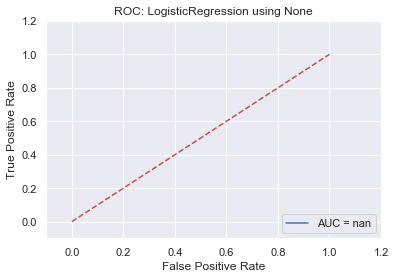

LogisticRegression  with  None  scored =   93.87755102040816  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


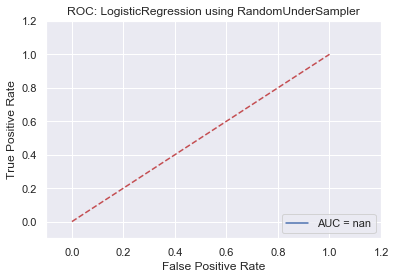

LogisticRegression  with  RandomUnderSampler  scored =   33.33333333333333  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


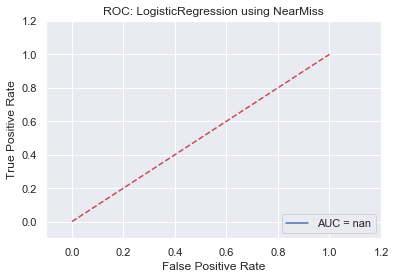

LogisticRegression  with  NearMiss  scored =   33.33333333333333  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


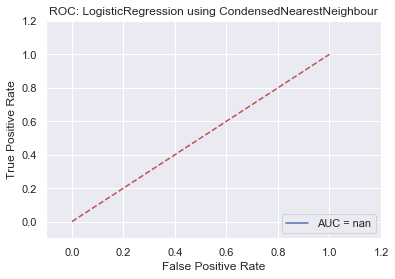

LogisticRegression  with  CondensedNearestNeighbour  scored =   91.66666666666666  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


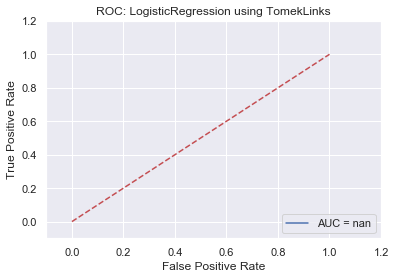

LogisticRegression  with  TomekLinks  scored =   93.87755102040816  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


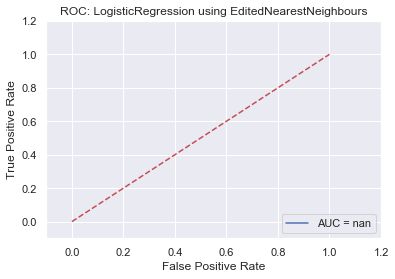

LogisticRegression  with  EditedNearestNeighbours  scored =   95.55555555555556  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


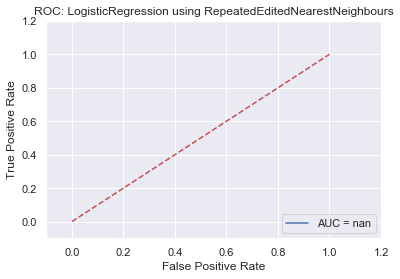

LogisticRegression  with  RepeatedEditedNearestNeighbours  scored =   97.72727272727273  on test set with AUC =  nan


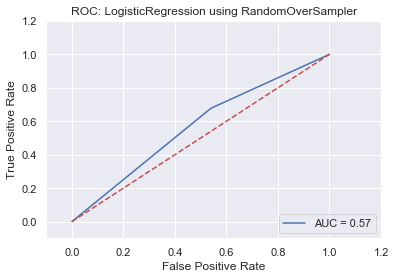

LogisticRegression  with  RandomOverSampler  scored =   53.191489361702125  on test set with AUC =  0.568868407578085


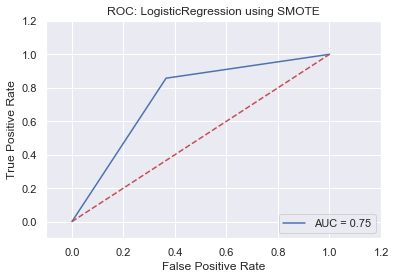

LogisticRegression  with  SMOTE  scored =   73.40425531914893  on test set with AUC =  0.7458791208791209


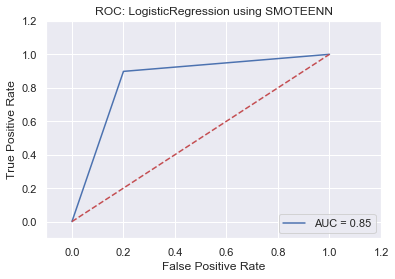

LogisticRegression  with  SMOTEENN  scored =   86.07594936708861  on test set with AUC =  0.8489795918367348


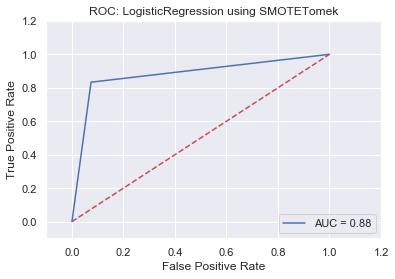

LogisticRegression  with  SMOTETomek  scored =   86.41975308641975  on test set with AUC =  0.8796296296296298


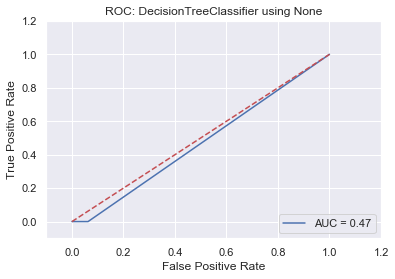

DecisionTreeClassifier  with  None  scored =   91.83673469387756  on test set with AUC =  0.46875


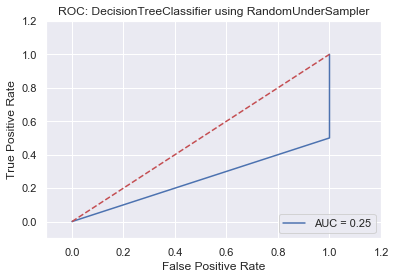

DecisionTreeClassifier  with  RandomUnderSampler  scored =   33.33333333333333  on test set with AUC =  0.25


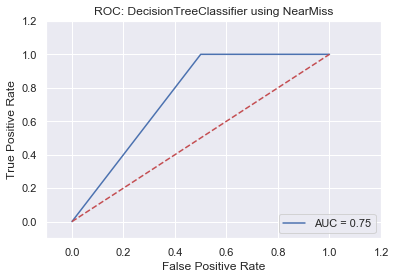

DecisionTreeClassifier  with  NearMiss  scored =   66.66666666666666  on test set with AUC =  0.75


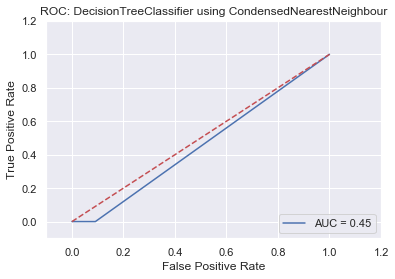

DecisionTreeClassifier  with  CondensedNearestNeighbour  scored =   83.33333333333334  on test set with AUC =  0.45454545454545453


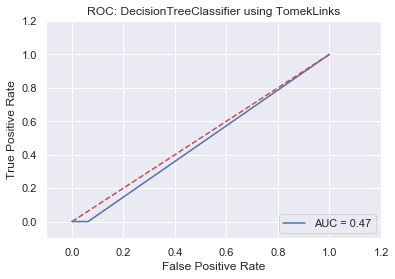

DecisionTreeClassifier  with  TomekLinks  scored =   91.83673469387756  on test set with AUC =  0.46875


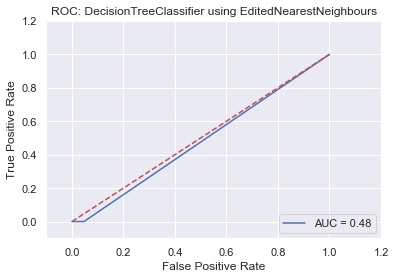

DecisionTreeClassifier  with  EditedNearestNeighbours  scored =   91.11111111111111  on test set with AUC =  0.47674418604651164


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


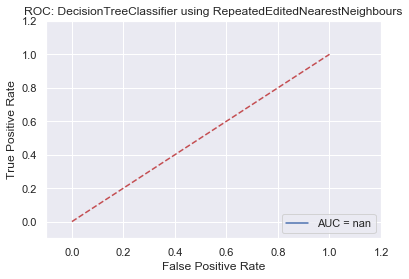

DecisionTreeClassifier  with  RepeatedEditedNearestNeighbours  scored =   97.72727272727273  on test set with AUC =  nan


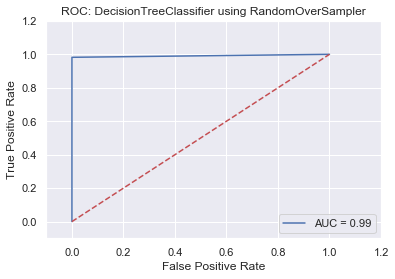

DecisionTreeClassifier  with  RandomOverSampler  scored =   98.93617021276596  on test set with AUC =  0.9910714285714286


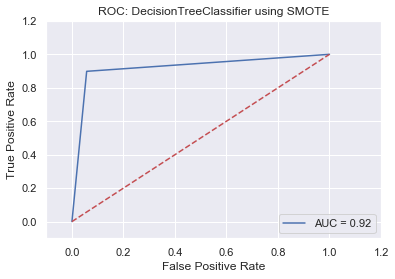

DecisionTreeClassifier  with  SMOTE  scored =   91.48936170212765  on test set with AUC =  0.9205811138014528


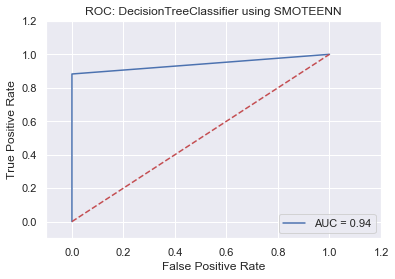

DecisionTreeClassifier  with  SMOTEENN  scored =   92.5925925925926  on test set with AUC =  0.9411764705882353


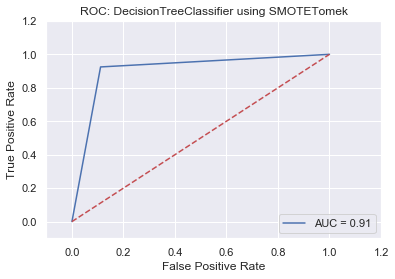

DecisionTreeClassifier  with  SMOTETomek  scored =   91.25  on test set with AUC =  0.9067085953878405


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


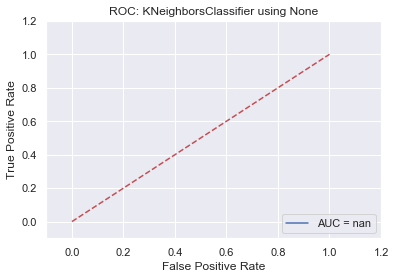

KNeighborsClassifier  with  None  scored =   93.87755102040816  on test set with AUC =  nan


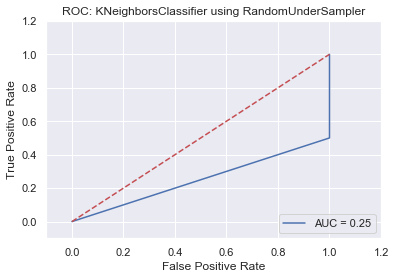

KNeighborsClassifier  with  RandomUnderSampler  scored =   33.33333333333333  on test set with AUC =  0.25


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


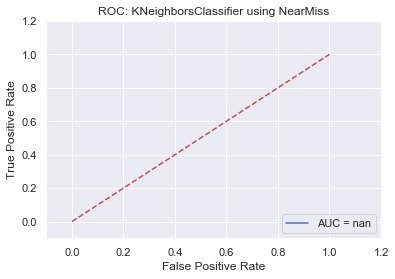

KNeighborsClassifier  with  NearMiss  scored =   33.33333333333333  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


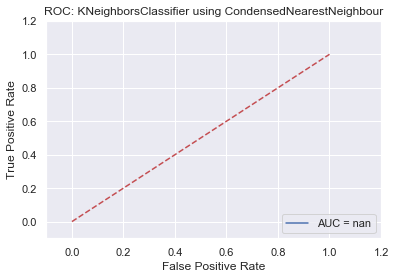

KNeighborsClassifier  with  CondensedNearestNeighbour  scored =   91.66666666666666  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


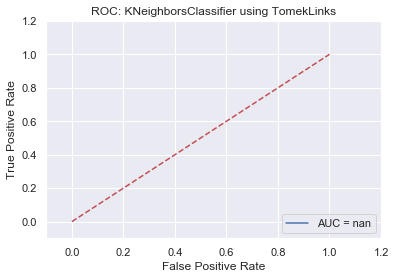

KNeighborsClassifier  with  TomekLinks  scored =   93.87755102040816  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


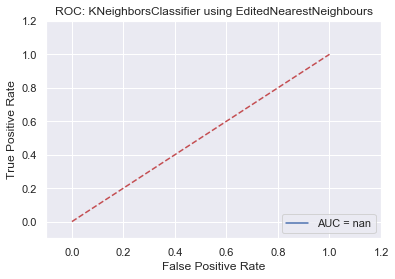

KNeighborsClassifier  with  EditedNearestNeighbours  scored =   95.55555555555556  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


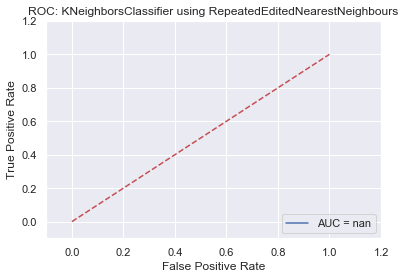

KNeighborsClassifier  with  RepeatedEditedNearestNeighbours  scored =   97.72727272727273  on test set with AUC =  nan


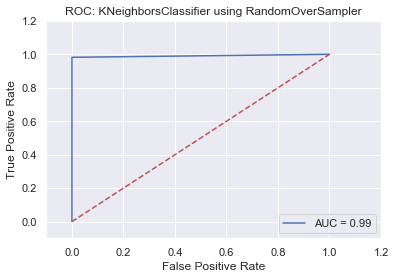

KNeighborsClassifier  with  RandomOverSampler  scored =   98.93617021276596  on test set with AUC =  0.9910714285714286


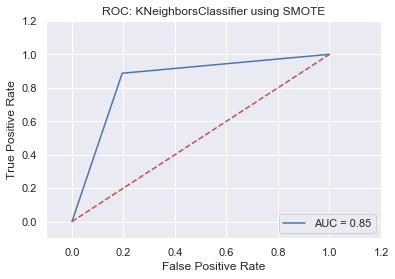

KNeighborsClassifier  with  SMOTE  scored =   85.1063829787234  on test set with AUC =  0.8458352508053383


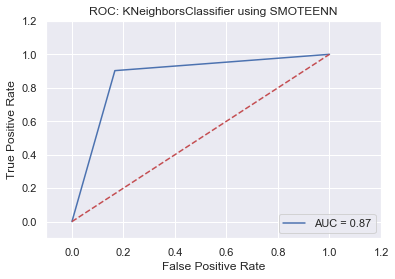

KNeighborsClassifier  with  SMOTEENN  scored =   87.01298701298701  on test set with AUC =  0.8678861788617886


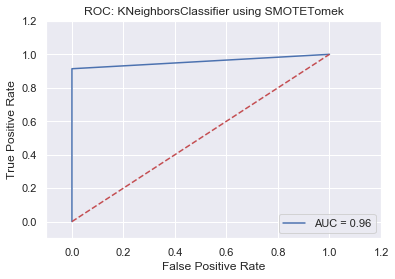

KNeighborsClassifier  with  SMOTETomek  scored =   93.82716049382715  on test set with AUC =  0.9568965517241379


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


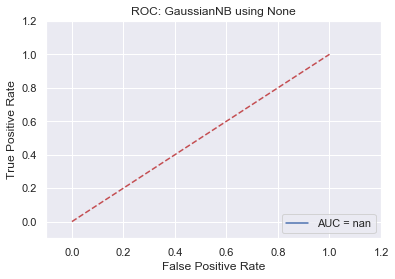

GaussianNB  with  None  scored =   93.87755102040816  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


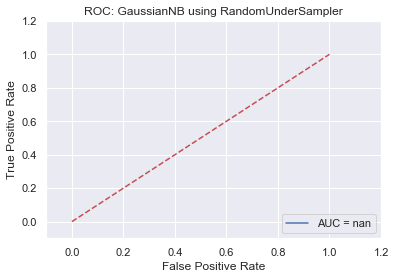

GaussianNB  with  RandomUnderSampler  scored =   33.33333333333333  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


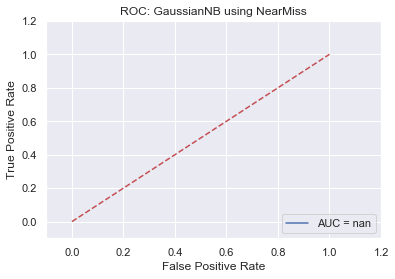

GaussianNB  with  NearMiss  scored =   33.33333333333333  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


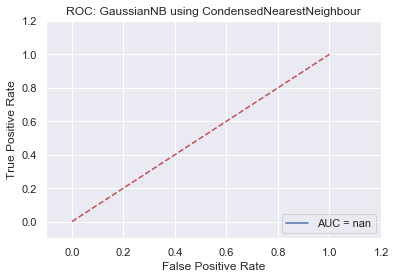

GaussianNB  with  CondensedNearestNeighbour  scored =   72.72727272727273  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


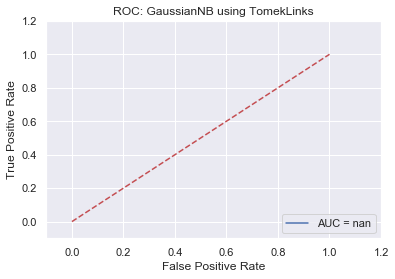

GaussianNB  with  TomekLinks  scored =   93.87755102040816  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


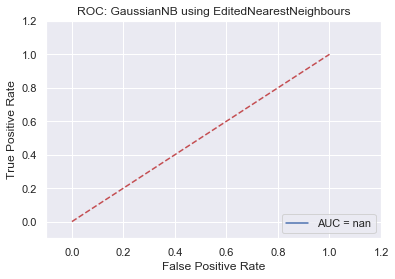

GaussianNB  with  EditedNearestNeighbours  scored =   95.55555555555556  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


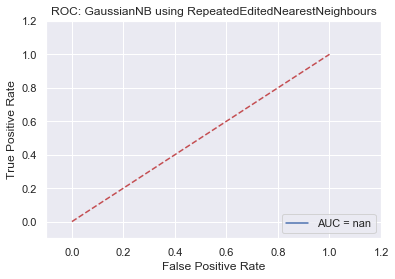

GaussianNB  with  RepeatedEditedNearestNeighbours  scored =   97.72727272727273  on test set with AUC =  nan


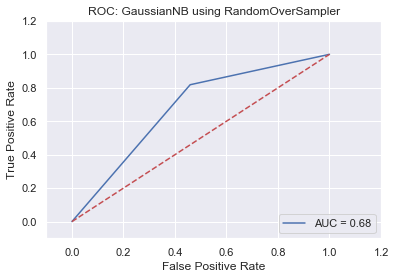

GaussianNB  with  RandomOverSampler  scored =   63.829787234042556  on test set with AUC =  0.6795827123695977


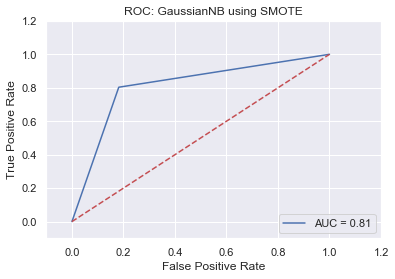

GaussianNB  with  SMOTE  scored =   80.85106382978722  on test set with AUC =  0.8107302533532041


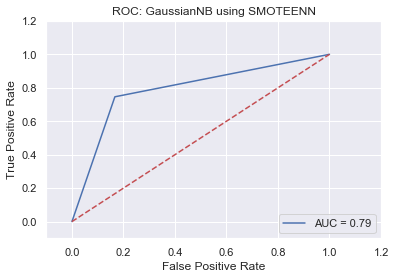

GaussianNB  with  SMOTEENN  scored =   76.5432098765432  on test set with AUC =  0.7896825396825398


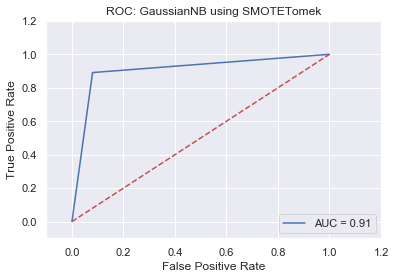

GaussianNB  with  SMOTETomek  scored =   90.0  on test set with AUC =  0.9054545454545455


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


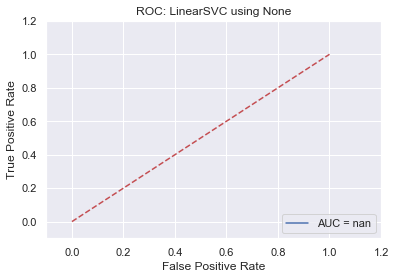

LinearSVC  with  None  scored =   93.87755102040816  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


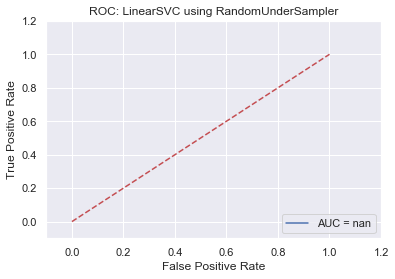

LinearSVC  with  RandomUnderSampler  scored =   33.33333333333333  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


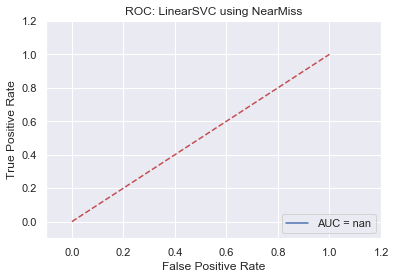

LinearSVC  with  NearMiss  scored =   33.33333333333333  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


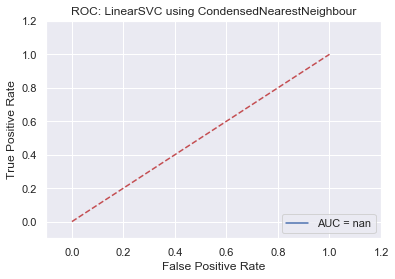

LinearSVC  with  CondensedNearestNeighbour  scored =   91.66666666666666  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


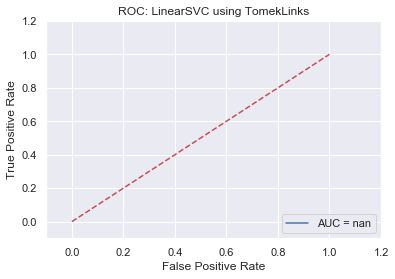

LinearSVC  with  TomekLinks  scored =   93.87755102040816  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


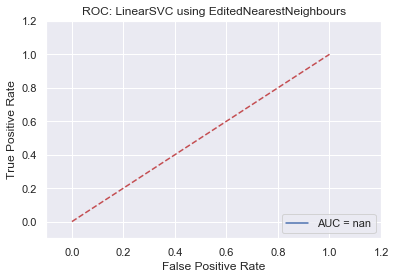

LinearSVC  with  EditedNearestNeighbours  scored =   95.55555555555556  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


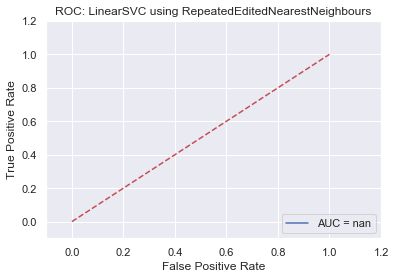

LinearSVC  with  RepeatedEditedNearestNeighbours  scored =   97.72727272727273  on test set with AUC =  nan


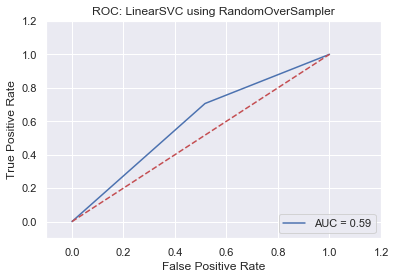

LinearSVC  with  RandomOverSampler  scored =   56.38297872340425  on test set with AUC =  0.5946078431372549


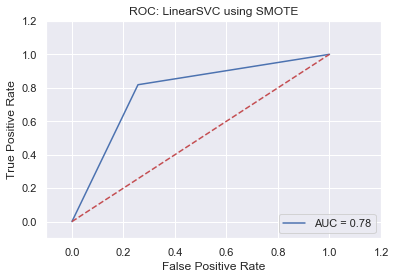

LinearSVC  with  SMOTE  scored =   78.72340425531915  on test set with AUC =  0.780885780885781


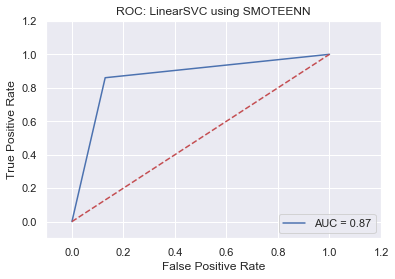

LinearSVC  with  SMOTEENN  scored =   86.41975308641975  on test set with AUC =  0.8654838709677419


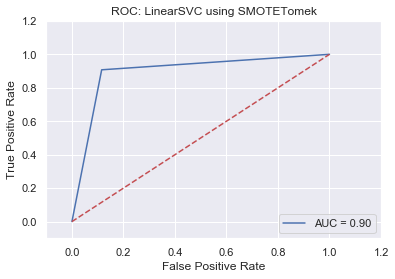

LinearSVC  with  SMOTETomek  scored =   90.0  on test set with AUC =  0.896011396011396


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


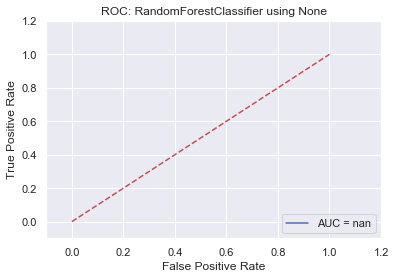

RandomForestClassifier  with  None  scored =   93.87755102040816  on test set with AUC =  nan


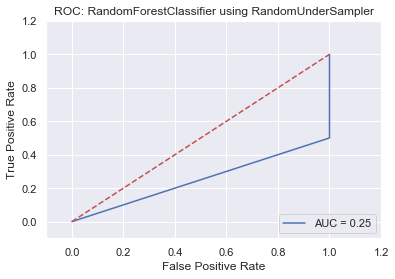

RandomForestClassifier  with  RandomUnderSampler  scored =   33.33333333333333  on test set with AUC =  0.25


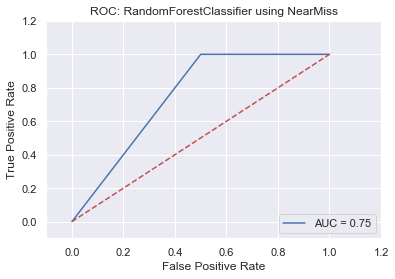

RandomForestClassifier  with  NearMiss  scored =   66.66666666666666  on test set with AUC =  0.75


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


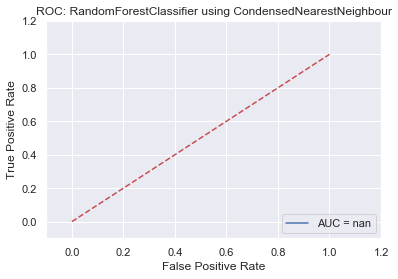

RandomForestClassifier  with  CondensedNearestNeighbour  scored =   91.66666666666666  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


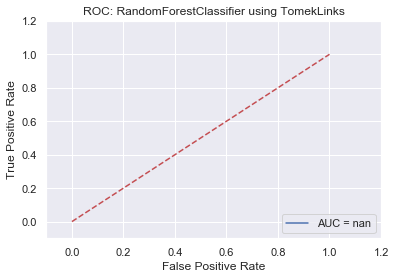

RandomForestClassifier  with  TomekLinks  scored =   93.87755102040816  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


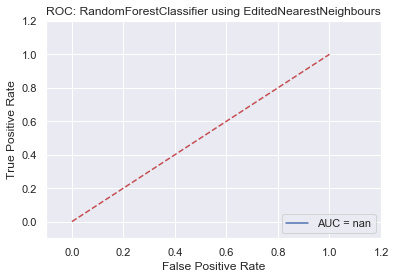

RandomForestClassifier  with  EditedNearestNeighbours  scored =   95.55555555555556  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


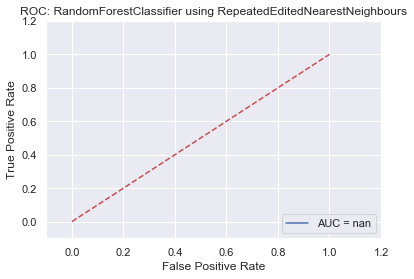

RandomForestClassifier  with  RepeatedEditedNearestNeighbours  scored =   97.72727272727273  on test set with AUC =  nan


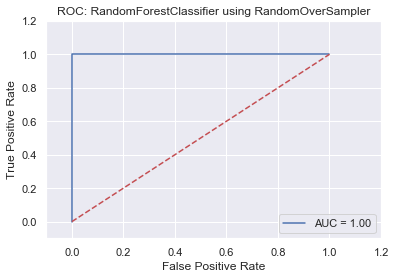

RandomForestClassifier  with  RandomOverSampler  scored =   100.0  on test set with AUC =  1.0


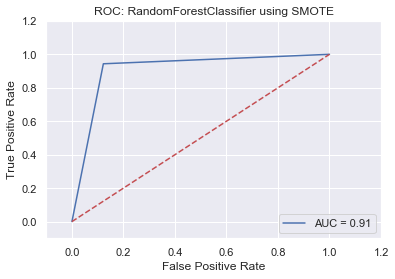

RandomForestClassifier  with  SMOTE  scored =   91.48936170212765  on test set with AUC =  0.9107225034514496


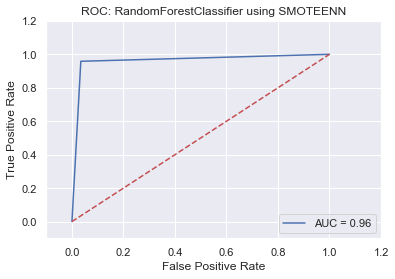

RandomForestClassifier  with  SMOTEENN  scored =   96.1038961038961  on test set with AUC =  0.961925287356322


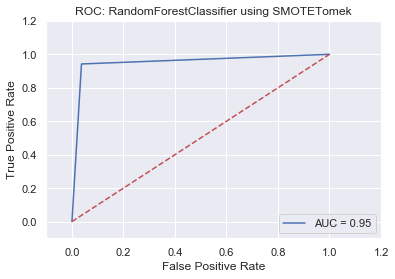

RandomForestClassifier  with  SMOTETomek  scored =   94.9367088607595  on test set with AUC =  0.9526353276353277


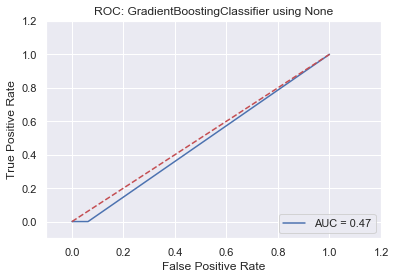

GradientBoostingClassifier  with  None  scored =   91.83673469387756  on test set with AUC =  0.46875


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


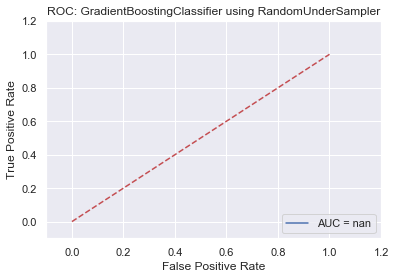

GradientBoostingClassifier  with  RandomUnderSampler  scored =   33.33333333333333  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


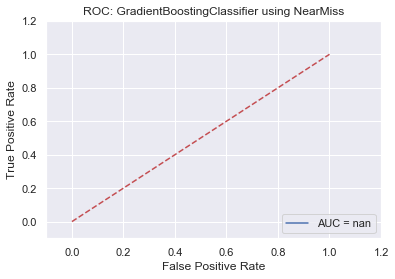

GradientBoostingClassifier  with  NearMiss  scored =   33.33333333333333  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


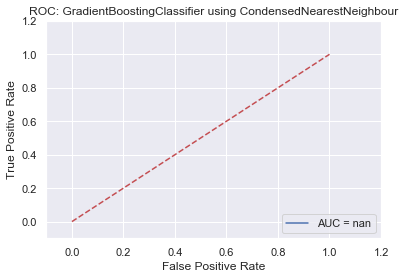

GradientBoostingClassifier  with  CondensedNearestNeighbour  scored =   91.66666666666666  on test set with AUC =  nan


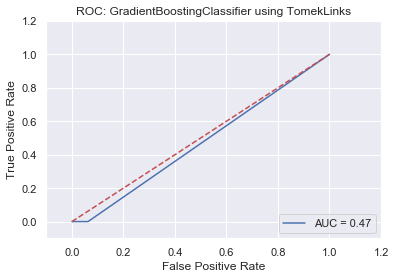

GradientBoostingClassifier  with  TomekLinks  scored =   91.83673469387756  on test set with AUC =  0.46875


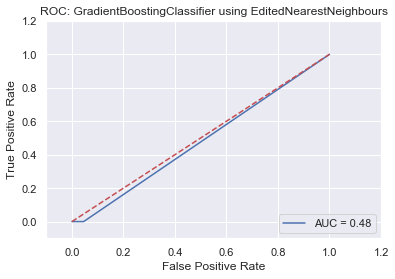

GradientBoostingClassifier  with  EditedNearestNeighbours  scored =   93.33333333333333  on test set with AUC =  0.4772727272727273


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


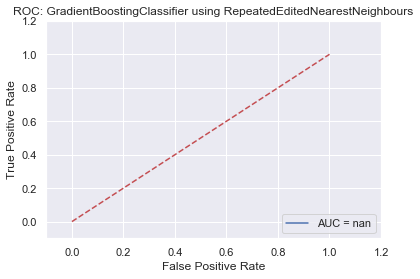

GradientBoostingClassifier  with  RepeatedEditedNearestNeighbours  scored =   97.72727272727273  on test set with AUC =  nan


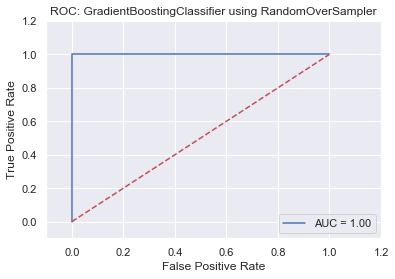

GradientBoostingClassifier  with  RandomOverSampler  scored =   100.0  on test set with AUC =  1.0


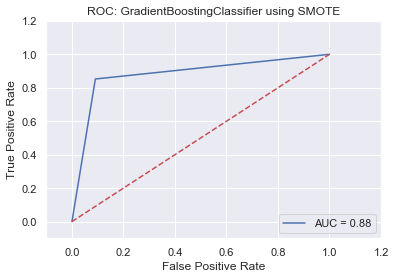

GradientBoostingClassifier  with  SMOTE  scored =   87.2340425531915  on test set with AUC =  0.8807749627421759


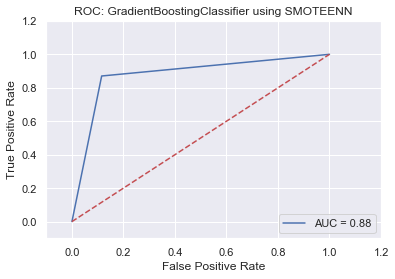

GradientBoostingClassifier  with  SMOTEENN  scored =   87.5  on test set with AUC =  0.8774928774928774


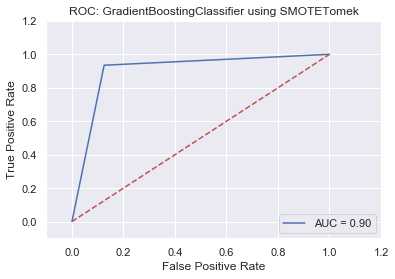

GradientBoostingClassifier  with  SMOTETomek  scored =   91.02564102564102  on test set with AUC =  0.9048913043478262


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


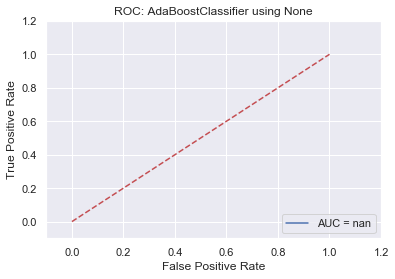

AdaBoostClassifier  with  None  scored =   93.87755102040816  on test set with AUC =  nan


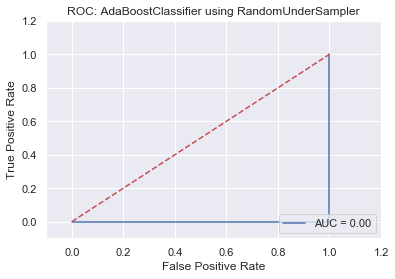

AdaBoostClassifier  with  RandomUnderSampler  scored =   0.0  on test set with AUC =  0.0


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


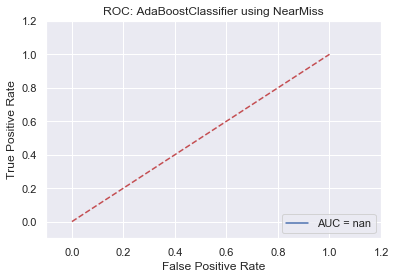

AdaBoostClassifier  with  NearMiss  scored =   33.33333333333333  on test set with AUC =  nan


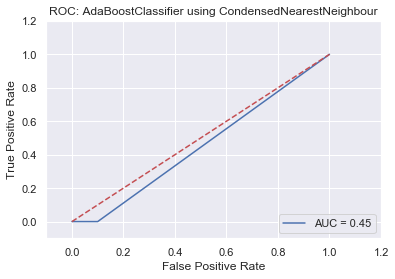

AdaBoostClassifier  with  CondensedNearestNeighbour  scored =   75.0  on test set with AUC =  0.45


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


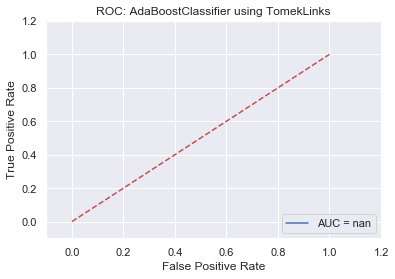

AdaBoostClassifier  with  TomekLinks  scored =   93.87755102040816  on test set with AUC =  nan


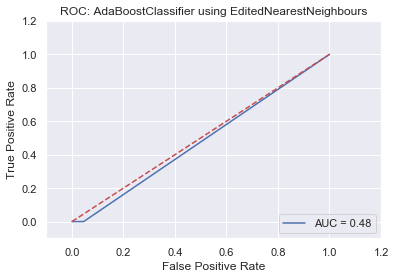

AdaBoostClassifier  with  EditedNearestNeighbours  scored =   93.33333333333333  on test set with AUC =  0.4772727272727273


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


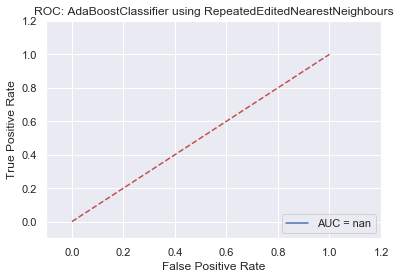

AdaBoostClassifier  with  RepeatedEditedNearestNeighbours  scored =   97.72727272727273  on test set with AUC =  nan


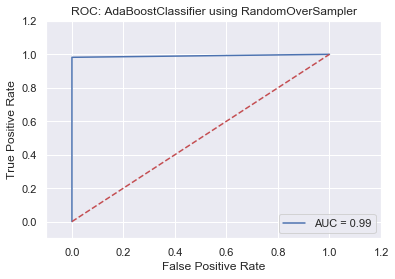

AdaBoostClassifier  with  RandomOverSampler  scored =   98.93617021276596  on test set with AUC =  0.9910714285714286


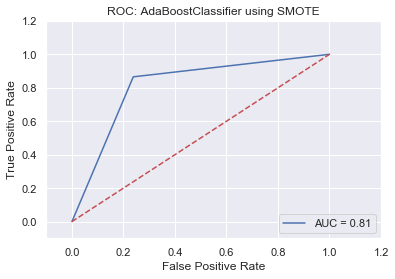

AdaBoostClassifier  with  SMOTE  scored =   81.91489361702128  on test set with AUC =  0.8136446886446886


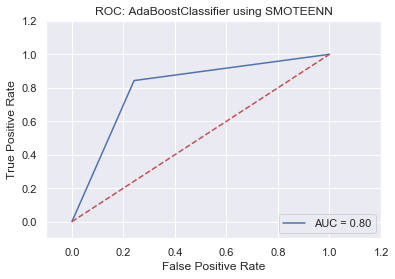

AdaBoostClassifier  with  SMOTEENN  scored =   81.25  on test set with AUC =  0.8008789722785665


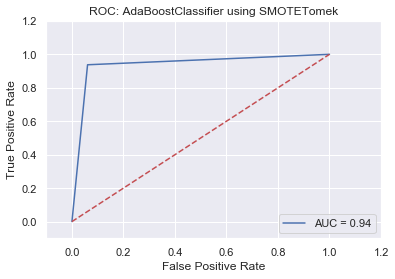

AdaBoostClassifier  with  SMOTETomek  scored =   93.82716049382715  on test set with AUC =  0.9384469696969698


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


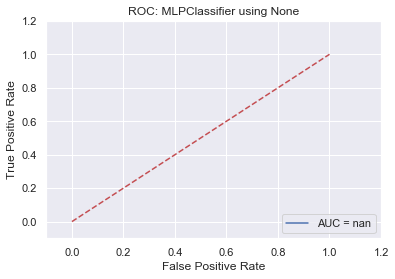

MLPClassifier  with  None  scored =   93.87755102040816  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


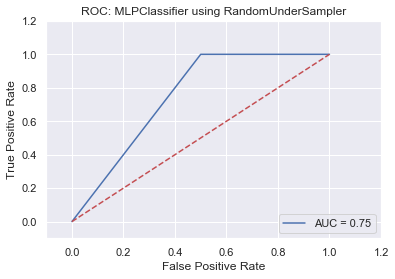

MLPClassifier  with  RandomUnderSampler  scored =   66.66666666666666  on test set with AUC =  0.75


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


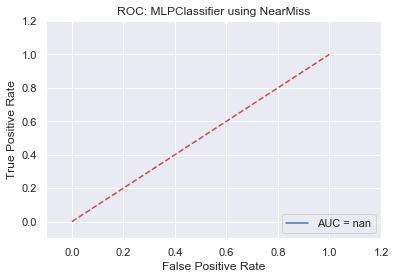

MLPClassifier  with  NearMiss  scored =   33.33333333333333  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


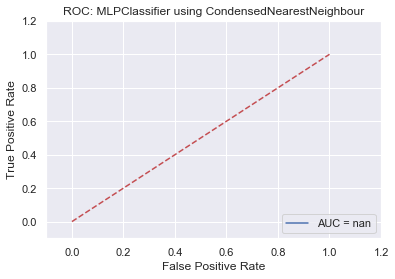

MLPClassifier  with  CondensedNearestNeighbour  scored =   100.0  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


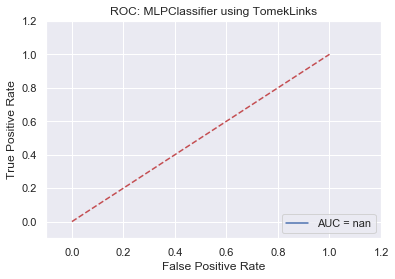

MLPClassifier  with  TomekLinks  scored =   93.87755102040816  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


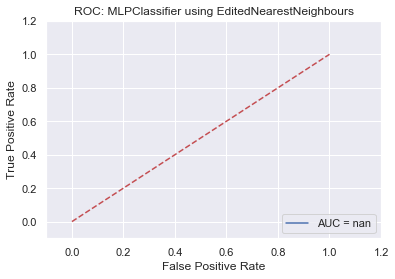

MLPClassifier  with  EditedNearestNeighbours  scored =   95.55555555555556  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


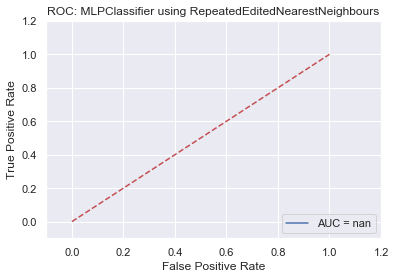

MLPClassifier  with  RepeatedEditedNearestNeighbours  scored =   97.72727272727273  on test set with AUC =  nan


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


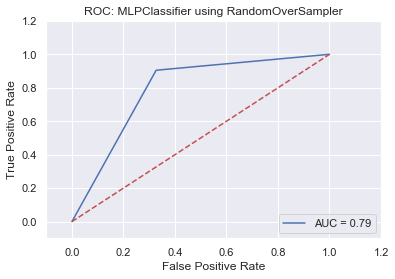

MLPClassifier  with  RandomOverSampler  scored =   77.6595744680851  on test set with AUC =  0.788919413919414


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


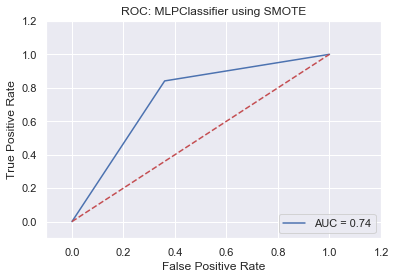

MLPClassifier  with  SMOTE  scored =   73.40425531914893  on test set with AUC =  0.7404545454545455


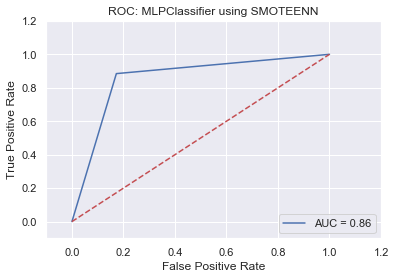

MLPClassifier  with  SMOTEENN  scored =   86.41975308641975  on test set with AUC =  0.8561007957559682


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


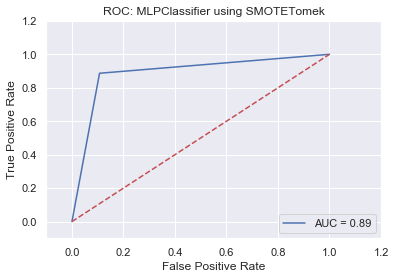

MLPClassifier  with  SMOTETomek  scored =   88.88888888888889  on test set with AUC =  0.8898247978436659


In [24]:
Classifiers = ['LogisticRegression', 'DecisionTreeClassifier', 'KNeighborsClassifier', 'GaussianNB', 'LinearSVC', 'RandomForestClassifier',
               'GradientBoostingClassifier', 'AdaBoostClassifier', 'MLPClassifier']
Samplers = ['None', 'RandomUnderSampler', 'NearMiss', 'CondensedNearestNeighbour', 'TomekLinks', 'EditedNearestNeighbours',
            'RepeatedEditedNearestNeighbours', 'RandomOverSampler', 'SMOTE', 'SMOTEENN', 'SMOTETomek']
summary = tryAll(Classifiers, Samplers, X, y)

### Summary

In [25]:
summ = pd.DataFrame(summary, columns = Samplers, index = Classifiers)
summ

,None,RandomUnderSampler,NearMiss,CondensedNearestNeighbour,TomekLinks,EditedNearestNeighbours,RepeatedEditedNearestNeighbours,RandomOverSampler,SMOTE,SMOTEENN,SMOTETomek
LogisticRegression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.568868,0.745879,0.848980,0.879630
DecisionTreeClassifier,0.46875,0.25,0.75,0.454545,0.46875,0.476744,NaN,0.991071,0.920581,0.941176,0.906709
KNeighborsClassifier,NaN,0.25,NaN,NaN,NaN,NaN,NaN,0.991071,0.845835,0.867886,0.956897
GaussianNB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.679583,0.810730,0.789683,0.905455
LinearSVC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.594608,0.780886,0.865484,0.896011
RandomForestClassifier,NaN,0.25,0.75,NaN,NaN,NaN,NaN,1.000000,0.910723,0.961925,0.952635
GradientBoostingClassifier,0.46875,NaN,NaN,NaN,0.46875,0.477273,NaN,1.000000,0.880775,0.877493,0.904891
AdaBoostClassifier,NaN,0.00,NaN,0.450000,NaN,0.477273,NaN,0.991071,0.813645,0.800879,0.938447
MLPClassifier,NaN,0.75,NaN,NaN,NaN,NaN,NaN,0.788919,0.740455,0.856101,0.889825


### Cross validation scores for all the classifiers and samplers

In [26]:
X.shape, y.shape

((321, 22), (321,))

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state = 0)

In [28]:
#classifiers
logReg = LogisticRegression()
decTree = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors=4)
nb = GaussianNB()
svc = LinearSVC()
rf = RandomForestClassifier()
gradBst = GradientBoostingClassifier()
adaBst = AdaBoostClassifier()
MLP = MLPClassifier()
#pca
pca = PCA(n_components=2)
X = pca.fit_transform(X)
report_cv = np.zeros((11,9))

### Original data (before resampling)

In [29]:
cv_logReg = cross_val_score(logReg, X, y)
cv_logReg = cv_logReg.mean()
cv_decTree = cross_val_score(decTree, X, y)
cv_decTree = cv_decTree.mean()
cv_knn = cross_val_score(knn, X, y)
cv_knn = cv_knn.mean()
cv_nb = cross_val_score(nb, X, y)
cv_nb = cv_nb.mean()
cv_svc = cross_val_score(svc, X, y)
cv_svc = cv_svc.mean()
cv_rf = cross_val_score(rf, X, y)
cv_rf = cv_rf.mean()
cv_gradBst = cross_val_score(gradBst, X, y)
cv_gradBst = cv_gradBst.mean()
cv_adaBst = cross_val_score(adaBst, X, y)
cv_adaBst = cv_adaBst.mean()
cv_MLP = cross_val_score(MLP, X, y)
cv_MLP = cv_MLP.mean()

print('Before Resampling the real data: ')
print('logReg:    ', cv_logReg)
print('decTree:   ', cv_decTree)
print('knn:       ', cv_knn)
print('nb:        ', cv_nb)
print('svc:       ', cv_svc)
print('rf:        ', cv_rf)
print('gradBst:   ', cv_gradBst)
print('adaBst:    ', cv_adaBst)
print('MLP:       ', cv_MLP)

report_cv[0, :] = [cv_logReg, cv_decTree, cv_knn, cv_nb, cv_svc, cv_rf, cv_gradBst, cv_adaBst, cv_MLP]

Before Resampling the real data: 
logReg:     0.9688461538461539
decTree:    0.9408173076923078
knn:        0.9688461538461539
nb:         0.9688461538461539
svc:        0.9688461538461539
rf:         0.9657692307692308
gradBst:    0.9470673076923077
adaBst:     0.9533653846153847
MLP:        0.9688461538461539


### Random Undersampling

In [30]:
sm = RandomUnderSampler()
X_rs, y_rs = sm.fit_sample(X, y)

cv_logReg = cross_val_score(logReg, X_rs, y_rs)
cv_logReg = cv_logReg.mean()
cv_decTree = cross_val_score(decTree, X_rs, y_rs)
cv_decTree = cv_decTree.mean()
cv_knn = cross_val_score(knn, X_rs, y_rs)
cv_knn = cv_knn.mean()
cv_nb = cross_val_score(nb, X_rs, y_rs)
cv_nb = cv_nb.mean()
cv_svc = cross_val_score(svc, X_rs, y_rs)
cv_svc = cv_svc.mean()
cv_rf = cross_val_score(rf, X_rs, y_rs)
cv_rf = cv_rf.mean()
cv_gradBst = cross_val_score(gradBst, X_rs, y_rs)
cv_gradBst = cv_gradBst.mean()
cv_adaBst = cross_val_score(adaBst, X_rs, y_rs)
cv_adaBst = cv_adaBst.mean()
cv_MLP = cross_val_score(MLP, X_rs, y_rs)
cv_MLP = cv_MLP.mean()

print('After applying Random undersampling technique: ')
print('logReg:    ', cv_logReg)
print('decTree:   ', cv_decTree)
print('knn:       ', cv_knn)
print('nb:        ', cv_nb)
print('svc:       ', cv_svc)
print('rf:        ', cv_rf)
print('gradBst:   ', cv_gradBst)
print('adaBst:    ', cv_adaBst)
print('MLP:       ', cv_MLP)

report_cv[1, :] = [cv_logReg, cv_decTree, cv_knn, cv_nb, cv_svc, cv_rf, cv_gradBst, cv_adaBst, cv_MLP]

c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


After applying Random undersampling technique: 
logReg:     0.55
decTree:    0.6
knn:        0.6
nb:         0.5
svc:        0.55
rf:         0.5
gradBst:    0.45
adaBst:     0.5
MLP:        0.45


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### NearMiss

In [31]:
sm = NearMiss()
X_rs, y_rs = sm.fit_sample(X, y)

cv_logReg = cross_val_score(logReg, X_rs, y_rs)
cv_logReg = cv_logReg.mean()
cv_decTree = cross_val_score(decTree, X_rs, y_rs)
cv_decTree = cv_decTree.mean()
cv_knn = cross_val_score(knn, X_rs, y_rs)
cv_knn = cv_knn.mean()
cv_nb = cross_val_score(nb, X_rs, y_rs)
cv_nb = cv_nb.mean()
cv_svc = cross_val_score(svc, X_rs, y_rs)
cv_svc = cv_svc.mean()
cv_rf = cross_val_score(rf, X_rs, y_rs)
cv_rf = cv_rf.mean()
cv_gradBst = cross_val_score(gradBst, X_rs, y_rs)
cv_gradBst = cv_gradBst.mean()
cv_adaBst = cross_val_score(adaBst, X_rs, y_rs)
cv_adaBst = cv_adaBst.mean()
cv_MLP = cross_val_score(MLP, X_rs, y_rs)
cv_MLP = cv_MLP.mean()

print('After applying NearMiss sampling technique: ')
print('logReg:    ', cv_logReg)
print('decTree:   ', cv_decTree)
print('knn:       ', cv_knn)
print('nb:        ', cv_nb)
print('svc:       ', cv_svc)
print('rf:        ', cv_rf)
print('gradBst:   ', cv_gradBst)
print('adaBst:    ', cv_adaBst)
print('MLP:       ', cv_MLP)

report_cv[2, :] = [cv_logReg, cv_decTree, cv_knn, cv_nb, cv_svc, cv_rf, cv_gradBst, cv_adaBst, cv_MLP]

c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stoch

After applying NearMiss sampling technique: 
logReg:     0.6
decTree:    0.4
knn:        0.45
nb:         0.6
svc:        0.6
rf:         0.55
gradBst:    0.5
adaBst:     0.5
MLP:        0.6


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### Condensed Nearest Neighbour

In [32]:
sm = CondensedNearestNeighbour()
X_rs, y_rs = sm.fit_sample(X, y)

cv_logReg = cross_val_score(logReg, X_rs, y_rs)
cv_logReg = cv_logReg.mean()
cv_decTree = cross_val_score(decTree, X_rs, y_rs)
cv_decTree = cv_decTree.mean()
cv_knn = cross_val_score(knn, X_rs, y_rs)
cv_knn = cv_knn.mean()
cv_nb = cross_val_score(nb, X_rs, y_rs)
cv_nb = cv_nb.mean()
cv_svc = cross_val_score(svc, X_rs, y_rs)
cv_svc = cv_svc.mean()
cv_rf = cross_val_score(rf, X_rs, y_rs)
cv_rf = cv_rf.mean()
cv_gradBst = cross_val_score(gradBst, X_rs, y_rs)
cv_gradBst = cv_gradBst.mean()
cv_adaBst = cross_val_score(adaBst, X_rs, y_rs)
cv_adaBst = cv_adaBst.mean()
cv_MLP = cross_val_score(MLP, X_rs, y_rs)
cv_MLP = cv_MLP.mean()

print('After applying Condensed Nearest Neighbours sampling technique: ')
print('logReg:    ', cv_logReg)
print('decTree:   ', cv_decTree)
print('knn:       ', cv_knn)
print('nb:        ', cv_nb)
print('svc:       ', cv_svc)
print('rf:        ', cv_rf)
print('gradBst:   ', cv_gradBst)
print('adaBst:    ', cv_adaBst)
print('MLP:       ', cv_MLP)

report_cv[3, :] = [cv_logReg, cv_decTree, cv_knn, cv_nb, cv_svc, cv_rf, cv_gradBst, cv_adaBst, cv_MLP]

c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


After applying Condensed Nearest Neighbours sampling technique: 
logReg:     0.8036363636363635
decTree:    0.5509090909090909
knn:        0.8036363636363635
nb:         0.8036363636363635
svc:        0.8036363636363635
rf:         0.6709090909090909
gradBst:    0.610909090909091
adaBst:     0.6672727272727274
MLP:        0.8036363636363635


### Tomek Links

In [33]:
sm = TomekLinks()
X_rs, y_rs = sm.fit_sample(X, y)

cv_logReg = cross_val_score(logReg, X_rs, y_rs)
cv_logReg = cv_logReg.mean()
cv_decTree = cross_val_score(decTree, X_rs, y_rs)
cv_decTree = cv_decTree.mean()
cv_knn = cross_val_score(knn, X_rs, y_rs)
cv_knn = cv_knn.mean()
cv_nb = cross_val_score(nb, X_rs, y_rs)
cv_nb = cv_nb.mean()
cv_svc = cross_val_score(svc, X_rs, y_rs)
cv_svc = cv_svc.mean()
cv_rf = cross_val_score(rf, X_rs, y_rs)
cv_rf = cv_rf.mean()
cv_gradBst = cross_val_score(gradBst, X_rs, y_rs)
cv_gradBst = cv_gradBst.mean()
cv_adaBst = cross_val_score(adaBst, X_rs, y_rs)
cv_adaBst = cv_adaBst.mean()
cv_MLP = cross_val_score(MLP, X_rs, y_rs)
cv_MLP = cv_MLP.mean()

print('After applying Tomek Links sampling technique: ')
print('logReg:    ', cv_logReg)
print('decTree:   ', cv_decTree)
print('knn:       ', cv_knn)
print('nb:        ', cv_nb)
print('svc:       ', cv_svc)
print('rf:        ', cv_rf)
print('gradBst:   ', cv_gradBst)
print('adaBst:    ', cv_adaBst)
print('MLP:       ', cv_MLP)

report_cv[4, :] = [cv_logReg, cv_decTree, cv_knn, cv_nb, cv_svc, cv_rf, cv_gradBst, cv_adaBst, cv_MLP]

After applying Tomek Links sampling technique: 
logReg:     0.9681515616999488
decTree:    0.9490527393753201
knn:        0.9681515616999488
nb:         0.9681515616999488
svc:        0.9681515616999488
rf:         0.9649769585253456
gradBst:    0.9490527393753201
adaBst:     0.9522273425499233
MLP:        0.9681515616999488


### Edited Nearest Neighbours

In [34]:
sm = EditedNearestNeighbours()
X_rs, y_rs = sm.fit_sample(X, y)

cv_logReg = cross_val_score(logReg, X_rs, y_rs)
cv_logReg = cv_logReg.mean()
cv_decTree = cross_val_score(decTree, X_rs, y_rs)
cv_decTree = cv_decTree.mean()
cv_knn = cross_val_score(knn, X_rs, y_rs)
cv_knn = cv_knn.mean()
cv_nb = cross_val_score(nb, X_rs, y_rs)
cv_nb = cv_nb.mean()
cv_svc = cross_val_score(svc, X_rs, y_rs)
cv_svc = cv_svc.mean()
cv_rf = cross_val_score(rf, X_rs, y_rs)
cv_rf = cv_rf.mean()
cv_gradBst = cross_val_score(gradBst, X_rs, y_rs)
cv_gradBst = cv_gradBst.mean()
cv_adaBst = cross_val_score(adaBst, X_rs, y_rs)
cv_adaBst = cv_adaBst.mean()
cv_MLP = cross_val_score(MLP, X_rs, y_rs)
cv_MLP = cv_MLP.mean()

print('After applying Edited Nearest Neighbours sampling technique: ')
print('logReg:    ', cv_logReg)
print('decTree:   ', cv_decTree)
print('knn:       ', cv_knn)
print('nb:        ', cv_nb)
print('svc:       ', cv_svc)
print('rf:        ', cv_rf)
print('gradBst:   ', cv_gradBst)
print('adaBst:    ', cv_adaBst)
print('MLP:       ', cv_MLP)

report_cv[5, :] = [cv_logReg, cv_decTree, cv_knn, cv_nb, cv_svc, cv_rf, cv_gradBst, cv_adaBst, cv_MLP]

After applying Edited Nearest Neighbours sampling technique: 
logReg:     0.9661016949152541
decTree:    0.9423728813559322
knn:        0.9661016949152541
nb:         0.9661016949152541
svc:        0.9661016949152541
rf:         0.9661016949152541
gradBst:    0.9525423728813559
adaBst:     0.9525423728813559
MLP:        0.9661016949152541


### Repeated Edited Nearest Neighbours

In [35]:
sm = RepeatedEditedNearestNeighbours()
X_rs, y_rs = sm.fit_sample(X, y)

cv_logReg = cross_val_score(logReg, X_rs, y_rs)
cv_logReg = cv_logReg.mean()
cv_decTree = cross_val_score(decTree, X_rs, y_rs)
cv_decTree = cv_decTree.mean()
cv_knn = cross_val_score(knn, X_rs, y_rs)
cv_knn = cv_knn.mean()
cv_nb = cross_val_score(nb, X_rs, y_rs)
cv_nb = cv_nb.mean()
cv_svc = cross_val_score(svc, X_rs, y_rs)
cv_svc = cv_svc.mean()
cv_rf = cross_val_score(rf, X_rs, y_rs)
cv_rf = cv_rf.mean()
cv_gradBst = cross_val_score(gradBst, X_rs, y_rs)
cv_gradBst = cv_gradBst.mean()
cv_adaBst = cross_val_score(adaBst, X_rs, y_rs)
cv_adaBst = cv_adaBst.mean()
cv_MLP = cross_val_score(MLP, X_rs, y_rs)
cv_MLP = cv_MLP.mean()

print('After applying Repeated Edited Nearest Neighbours sampling technique: ')
print('logReg:    ', cv_logReg)
print('decTree:   ', cv_decTree)
print('knn:       ', cv_knn)
print('nb:        ', cv_nb)
print('svc:       ', cv_svc)
print('rf:        ', cv_rf)
print('gradBst:   ', cv_gradBst)
print('adaBst:    ', cv_adaBst)
print('MLP:       ', cv_MLP)

report_cv[6, :] = [cv_logReg, cv_decTree, cv_knn, cv_nb, cv_svc, cv_rf, cv_gradBst, cv_adaBst, cv_MLP]

After applying Repeated Edited Nearest Neighbours sampling technique: 
logReg:     0.9646616541353383
decTree:    0.9540100250626565
knn:        0.9646616541353383
nb:         0.9646616541353383
svc:        0.9646616541353383
rf:         0.9646616541353383
gradBst:    0.9540726817042607
adaBst:     0.9540726817042607
MLP:        0.9646616541353383


### Random Oversampling

In [36]:
sm = RandomOverSampler()
X_rs, y_rs = sm.fit_sample(X, y)

cv_logReg = cross_val_score(logReg, X_rs, y_rs)
cv_logReg = cv_logReg.mean()
cv_decTree = cross_val_score(decTree, X_rs, y_rs)
cv_decTree = cv_decTree.mean()
cv_knn = cross_val_score(knn, X_rs, y_rs)
cv_knn = cv_knn.mean()
cv_nb = cross_val_score(nb, X_rs, y_rs)
cv_nb = cv_nb.mean()
cv_svc = cross_val_score(svc, X_rs, y_rs)
cv_svc = cv_svc.mean()
cv_rf = cross_val_score(rf, X_rs, y_rs)
cv_rf = cv_rf.mean()
cv_gradBst = cross_val_score(gradBst, X_rs, y_rs)
cv_gradBst = cv_gradBst.mean()
cv_adaBst = cross_val_score(adaBst, X_rs, y_rs)
cv_adaBst = cv_adaBst.mean()
cv_MLP = cross_val_score(MLP, X_rs, y_rs)
cv_MLP = cv_MLP.mean()

print('After applying Random oversampling technique: ')
print('logReg:    ', cv_logReg)
print('decTree:   ', cv_decTree)
print('knn:       ', cv_knn)
print('nb:        ', cv_nb)
print('svc:       ', cv_svc)
print('rf:        ', cv_rf)
print('gradBst:   ', cv_gradBst)
print('adaBst:    ', cv_adaBst)
print('MLP:       ', cv_MLP)

report_cv[7, :] = [cv_logReg, cv_decTree, cv_knn, cv_nb, cv_svc, cv_rf, cv_gradBst, cv_adaBst, cv_MLP]

c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stoch

After applying Random oversampling technique: 
logReg:     0.5016
decTree:    0.9759096774193547
knn:        0.9566580645161291
nb:         0.5578451612903226
svc:        0.5016
rf:         0.9855225806451612
gradBst:    0.969458064516129
adaBst:     0.9695096774193548
MLP:        0.7330709677419355


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### SMOTE

In [37]:
sm = SMOTE()
X_rs, y_rs = sm.fit_sample(X, y)

cv_logReg = cross_val_score(logReg, X_rs, y_rs)
cv_logReg = cv_logReg.mean()
cv_decTree = cross_val_score(decTree, X_rs, y_rs)
cv_decTree = cv_decTree.mean()
cv_knn = cross_val_score(knn, X_rs, y_rs)
cv_knn = cv_knn.mean()
cv_nb = cross_val_score(nb, X_rs, y_rs)
cv_nb = cv_nb.mean()
cv_svc = cross_val_score(svc, X_rs, y_rs)
cv_svc = cv_svc.mean()
cv_rf = cross_val_score(rf, X_rs, y_rs)
cv_rf = cv_rf.mean()
cv_gradBst = cross_val_score(gradBst, X_rs, y_rs)
cv_gradBst = cv_gradBst.mean()
cv_adaBst = cross_val_score(adaBst, X_rs, y_rs)
cv_adaBst = cv_adaBst.mean()
cv_MLP = cross_val_score(MLP, X_rs, y_rs)
cv_MLP = cv_MLP.mean()

print('After applying SMOTE sampling technique: ')
print('logReg:    ', cv_logReg)
print('decTree:   ', cv_decTree)
print('knn:       ', cv_knn)
print('nb:        ', cv_nb)
print('svc:       ', cv_svc)
print('rf:        ', cv_rf)
print('gradBst:   ', cv_gradBst)
print('adaBst:    ', cv_adaBst)
print('MLP:       ', cv_MLP)

report_cv[8, :] = [cv_logReg, cv_decTree, cv_knn, cv_nb, cv_svc, cv_rf, cv_gradBst, cv_adaBst, cv_MLP]

c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stoch

After applying SMOTE sampling technique: 
logReg:     0.4645161290322581
decTree:    0.7750709677419354
knn:        0.7910709677419355
nb:         0.6896774193548387
svc:        0.4661161290322581
rf:         0.8023612903225807
gradBst:    0.7766838709677419
adaBst:     0.7283870967741934
MLP:        0.7411483870967743


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### SMOTE-ENN

In [38]:
sm = SMOTEENN()
X_rs, y_rs = sm.fit_sample(X, y)

cv_logReg = cross_val_score(logReg, X_rs, y_rs)
cv_logReg = cv_logReg.mean()
cv_decTree = cross_val_score(decTree, X_rs, y_rs)
cv_decTree = cv_decTree.mean()
cv_knn = cross_val_score(knn, X_rs, y_rs)
cv_knn = cv_knn.mean()
cv_nb = cross_val_score(nb, X_rs, y_rs)
cv_nb = cv_nb.mean()
cv_svc = cross_val_score(svc, X_rs, y_rs)
cv_svc = cv_svc.mean()
cv_rf = cross_val_score(rf, X_rs, y_rs)
cv_rf = cv_rf.mean()
cv_gradBst = cross_val_score(gradBst, X_rs, y_rs)
cv_gradBst = cv_gradBst.mean()
cv_adaBst = cross_val_score(adaBst, X_rs, y_rs)
cv_adaBst = cv_adaBst.mean()
cv_MLP = cross_val_score(MLP, X_rs, y_rs)
cv_MLP = cv_MLP.mean()

print('After applying SMOTE + ENN sampling technique: ')
print('logReg:    ', cv_logReg)
print('decTree:   ', cv_decTree)
print('knn:       ', cv_knn)
print('nb:        ', cv_nb)
print('svc:       ', cv_svc)
print('rf:        ', cv_rf)
print('gradBst:   ', cv_gradBst)
print('adaBst:    ', cv_adaBst)
print('MLP:       ', cv_MLP)

report_cv[9, :] = [cv_logReg, cv_decTree, cv_knn, cv_nb, cv_svc, cv_rf, cv_gradBst, cv_adaBst, cv_MLP]

c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stoch

After applying SMOTE + ENN sampling technique: 
logReg:     0.46349965823650024
decTree:    0.9556732740943268
knn:        0.981784005468216
nb:         0.7033151059466849
svc:        0.46349965823650024
rf:         0.9661995898838004
gradBst:    0.9505468215994531
adaBst:     0.9063226247436773
MLP:        0.8308270676691729


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### SMOTE-Tomek

In [39]:
sm = SMOTETomek()
X_rs, y_rs = sm.fit_sample(X, y)

cv_logReg = cross_val_score(logReg, X_rs, y_rs)
cv_logReg = cv_logReg.mean()
cv_decTree = cross_val_score(decTree, X_rs, y_rs)
cv_decTree = cv_decTree.mean()
cv_knn = cross_val_score(knn, X_rs, y_rs)
cv_knn = cv_knn.mean()
cv_nb = cross_val_score(nb, X_rs, y_rs)
cv_nb = cv_nb.mean()
cv_svc = cross_val_score(svc, X_rs, y_rs)
cv_svc = cv_svc.mean()
cv_rf = cross_val_score(rf, X_rs, y_rs)
cv_rf = cv_rf.mean()
cv_gradBst = cross_val_score(gradBst, X_rs, y_rs)
cv_gradBst = cv_gradBst.mean()
cv_adaBst = cross_val_score(adaBst, X_rs, y_rs)
cv_adaBst = cv_adaBst.mean()
cv_MLP = cross_val_score(MLP, X_rs, y_rs)
cv_MLP = cv_MLP.mean()

print('After applying SMOTE + Tomek Links sampling technique: ')
print('logReg:    ', cv_logReg)
print('decTree:   ', cv_decTree)
print('knn:       ', cv_knn)
print('nb:        ', cv_nb)
print('svc:       ', cv_svc)
print('rf:        ', cv_rf)
print('gradBst:   ', cv_gradBst)
print('adaBst:    ', cv_adaBst)
print('MLP:       ', cv_MLP)

report_cv[10, :] = [cv_logReg, cv_decTree, cv_knn, cv_nb, cv_svc, cv_rf, cv_gradBst, cv_adaBst, cv_MLP]

c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stoch

After applying SMOTE + Tomek Links sampling technique: 
logReg:     0.46915642915642913
decTree:    0.835167895167895
knn:        0.8404750204750207
nb:         0.6865520065520065
svc:        0.46915642915642913
rf:         0.846011466011466
gradBst:    0.8115479115479115
adaBst:     0.7554627354627355
MLP:        0.7607698607698608


c:\users\divam\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### Cross Validation Summary

In [40]:
report_cv = np.transpose(report_cv)
report_cv_df = pd.DataFrame(report_cv, columns = Samplers, index = Classifiers)
report_cv_df

,None,RandomUnderSampler,NearMiss,CondensedNearestNeighbour,TomekLinks,EditedNearestNeighbours,RepeatedEditedNearestNeighbours,RandomOverSampler,SMOTE,SMOTEENN,SMOTETomek
LogisticRegression,0.968846,0.55,0.60,0.803636,0.968152,0.966102,0.964662,0.501600,0.464516,0.463500,0.469156
DecisionTreeClassifier,0.940817,0.60,0.40,0.550909,0.949053,0.942373,0.954010,0.975910,0.775071,0.955673,0.835168
KNeighborsClassifier,0.968846,0.60,0.45,0.803636,0.968152,0.966102,0.964662,0.956658,0.791071,0.981784,0.840475
GaussianNB,0.968846,0.50,0.60,0.803636,0.968152,0.966102,0.964662,0.557845,0.689677,0.703315,0.686552
LinearSVC,0.968846,0.55,0.60,0.803636,0.968152,0.966102,0.964662,0.501600,0.466116,0.463500,0.469156
RandomForestClassifier,0.965769,0.50,0.55,0.670909,0.964977,0.966102,0.964662,0.985523,0.802361,0.966200,0.846011
GradientBoostingClassifier,0.947067,0.45,0.50,0.610909,0.949053,0.952542,0.954073,0.969458,0.776684,0.950547,0.811548
AdaBoostClassifier,0.953365,0.50,0.50,0.667273,0.952227,0.952542,0.954073,0.969510,0.728387,0.906323,0.755463
MLPClassifier,0.968846,0.45,0.60,0.803636,0.968152,0.966102,0.964662,0.733071,0.741148,0.830827,0.760770


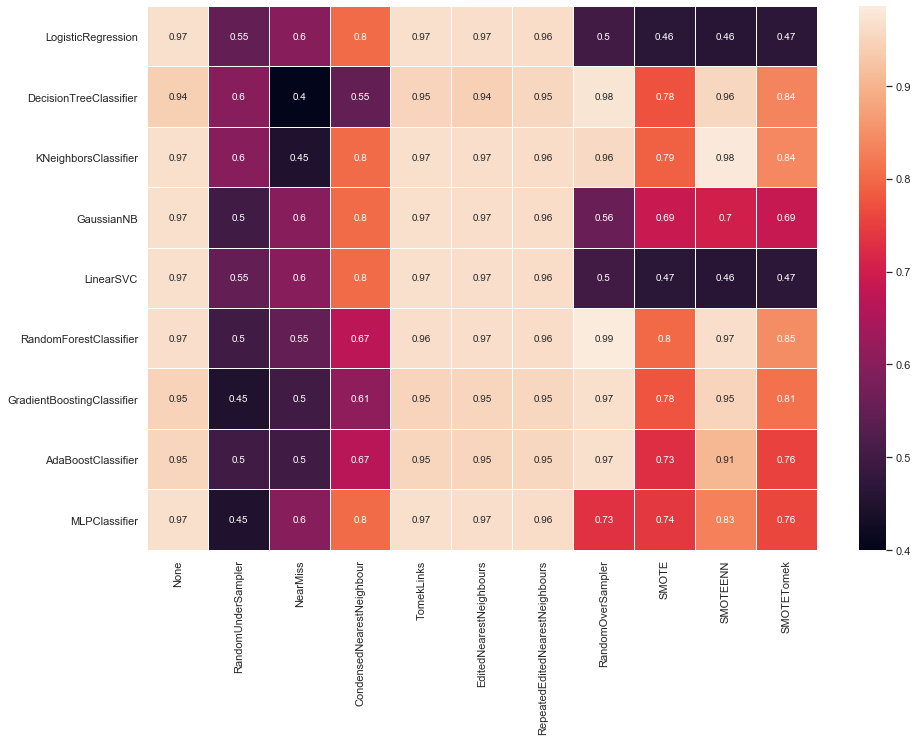

In [41]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(report_cv_df, xticklabels=Samplers, yticklabels=Classifiers, annot = True, linewidth=0.1)
plt.savefig("metric_mean_cv.png")